# Polarization example (GRB) - azimuthal scattering angle distribution (ASAD) method

This notebook fits the polarization fraction and angle of a GRB simulated using MEGAlib and combined with background. It's assumed that the start time, duration, localization, and spectrum of the GRB are already known. The GRB was simulated with 70% polarization at an angle of 110 degrees in the RelativeX convention, which corresponds to 83.015 degrees in the IAU convention.

The data to run this notebook, including GRBs simulated on-axis, 10 degrees off-axis, and 20 degrees off-axis, can be found on the COSI Pipeline Google Drive: https://drive.google.com/drive/folders/1kCkqQv07APSSlexeuIgK2Jj7eqJzNNgQ. However, with the RelativeZ response, it is not possible to fit the on-axis GRB.

Caveats/limitations:
- Currently, the source must be stationary with respect to the instrument, and the spacecraft must be stationary. The ability to fit the polarization of persistent sources will be added later. 
- The background simulation is used as the background model, and its ASAD is subtracted from the source+background ASAD.   

In [1]:
from cosipy import UnBinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.polarization.conventions import MEGAlibRelativeX, MEGAlibRelativeY, MEGAlibRelativeZ, IAUPolarizationConvention
from cosipy.polarization.polarization_stokes import PolarizationStokes

from cosipy.threeml.custom_functions import Band_Eflux
from astropy.time import Time
import numpy as np
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
from scoords import SpacecraftFrame


17:50:26 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=386416;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=180497;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=832278;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=282139;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

17:50:27 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=449988;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=56715;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

         INFO      Starting 3ML!                                                                     ]8;id=635725;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=447279;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=244207;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=451513;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=526327;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=325556;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=290416;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=918982;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

17:50:27 WARNING   ROOT minimizer not available                                                ]8;id=469875;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=181080;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=424528;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=772738;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=752082;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=322307;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=844829;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=593752;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=428747;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=287611;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=686076;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=654851;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=127096;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=599266;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=258193;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=293971;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=582073;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759145;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=805421;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=448983;file:///Users/mnegro/opt/anaconda3/envs/test_cosipy_env/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

Read in the data (GRB+background), background simulation, and define the path to the detector response

In [2]:
path = '/Users/mnegro/MyDocuments/_COSI/COSIpy/eliza_pull_request/eliza_data/'
analysis = UnBinnedData(path+'grb.yaml') # e.g. grb.yaml

analysis.select_data(unbinned_data=path+'GRB_20_0.hdf5', output_name=path+'GRB_20_0_selected.hdf5') # e.g. GRB_20_0.hdf5 & GRB_20_0_selected.hdf5
grb_data = analysis.get_dict_from_hdf5(path+'GRB_20_0_selected.hdf5') # e.g. GRB_20_0_selected.hdf5
background = analysis.get_dict_from_hdf5(path+'background.hdf5') # e.g. background.hdf5

response_file = path+'RelativeZ_200to500keV_1ebins_12pbins_log_flat.binnedpolarization.11D_nside8.h5' # e.g. HEALPixO3_200to500keV_1ebins_12pbins_log_flat.binnedpolarization.11D_nside8.area.h5

Read in the orientation file. Here, the spacecraft is stationary, so we are only using the first attitude bin

In [3]:
sc_orientation = SpacecraftFile.parse_from_file(path+'ori.ori') # e.g. ori.ori
sc_orientation = sc_orientation.source_interval(Time(analysis.tmin,format = 'unix'), Time(analysis.tmax,format = 'unix'))

attitude = sc_orientation.get_attitude()[0]

Define the GRB spectrum. This is convolved with the response to calculate the ASADs of an unpolarized and 100% polarized source

In [4]:
a = 10. * u.keV
b = 5000. * u.keV
alpha = 0.880
beta = -2.384
ebreak = 195.613 * u.keV
K = 10. / u.cm / u.cm / u.s

spectrum = Band_Eflux(a = a.value,
                      b = b.value,
                      alpha = alpha,
                      beta = beta,
                      E0 = ebreak.value,
                      K = K.value)

spectrum.a.unit = a.unit
spectrum.b.unit = b.unit
spectrum.E0.unit = ebreak.unit
spectrum.K.unit = K.unit

Define the source position and polarization object

In [5]:
source_direction = SkyCoord(0, 70, representation_type='spherical', frame=SpacecraftFrame(attitude=attitude), unit=u.deg)
source_photons = PolarizationStokes(source_direction, spectrum, response_file, sc_orientation)
az_ang = source_photons.calculate_azimuthal_scattering_angles(grb_data)

TOT_NUM_EVENTS = len(az_ang)
print(TOT_NUM_EVENTS)

This class loading takes around 30 seconds... 

1305


Calculate the Pseudo Stokes parameters from the scattering angle for each photon in the data and background simulation

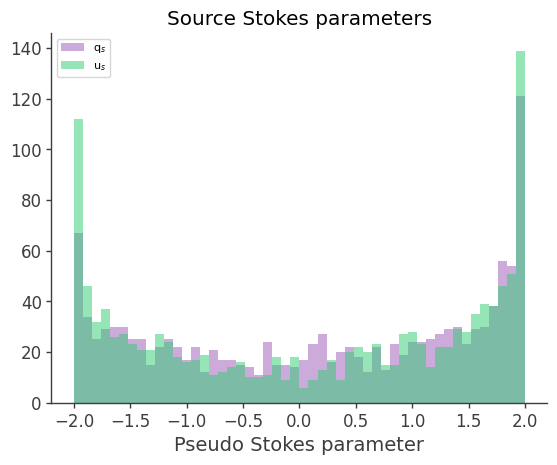

In [6]:
qs, us = source_photons.compute_pseudo_stokes(az_ang, show=True)
# np.save('qs.npy', qs)
# np.save('us.npy', us)

this task takes around 25 seconds...

Creating the unpolarized ASAD...


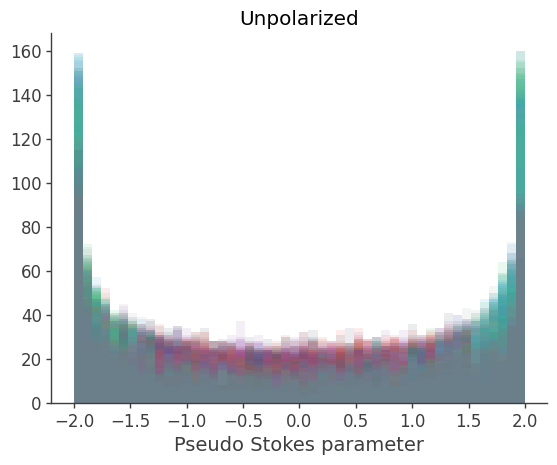

In [7]:
unpol_qs, unpol_us = source_photons.create_unpolarized_pseudo_stokes(TOT_NUM_EVENTS, show=True)
# np.save('unpol_qs.npy', unpol_qs)
# np.save('unpol_us.npy', unpol_us)

In [8]:
# mu, mu_err = source_photons.calculate_average_mu(bins=20, show=True) 
mu = 0.310
mu_err = 0.001

Compute the expected MDP assuming a background rate

In [9]:
# Compute the MDP for this observation, assuming a bkg rate

mdp = source_photons.calculate_mdp(TOT_NUM_EVENTS, mu, bkg_rate=22.0)
print('\nMDP:', mdp*100, '%')

Calculating the MDP...
Exposure: 12.999999999998863 s
Total number of events: 1305
Modulation factor: 0.31
Background rate: 22.0 ph/s
MDP_99%: 49.0599013039517 %

MDP: 49.0599013039517 %


modularion factor: 0.31 +/- 0.001
Q, U, unsubtracted: 0.6471561754610413 0.4242658685728328
Q, U, subtracted: 0.8546123469299894 0.34242031577874094
PD: 92.07 %
PA: 79.08 deg
rotated_Q, rotated_U: -0.8546123469299894 0.3424203157787407
-------  Q/I, U/I -0.8546123469299894 0.3424203157787407


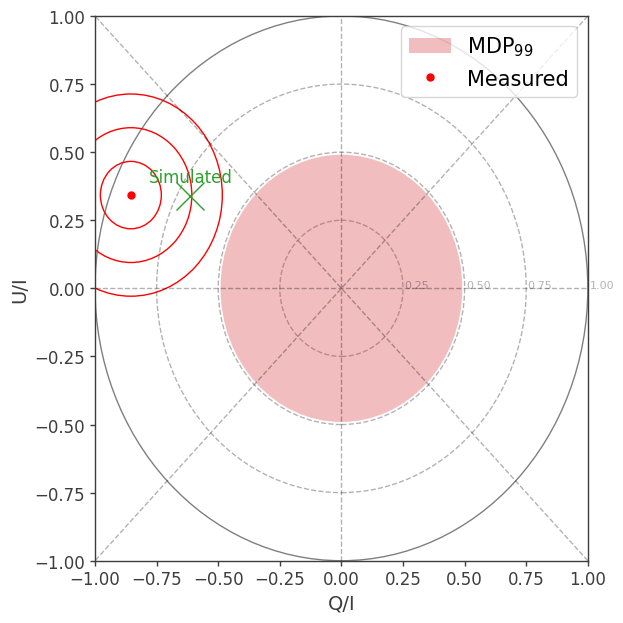

PD: 92.07 +/- 12.37 %
PA: 79.083 +/- 3.931
{'fraction': 0.9206595115368098, 'angle': <PolarizationAngle(79.08267196133524 deg at <SkyCoord (SpacecraftFrame: attitude=<quat = [ 0.21285156 -0.55655454  0.28687111  0.75009748], frame = galactic>, obstime=None, location=None): (lon, lat) in deg
    (0., 70.)> using convention <OrthographicConvention(starting from <SkyCoord (ICRS): (ra, dec) in deg
    (0., 90.)> and counter-clockwise when looking at the source)>)>, 'fraction uncertainty': 0.12373296682166211, 'angle uncertainty': <Angle 3.93104577 deg>, 'Q/I': -0.8546123469299894, 'U/I': 0.3424203157787407, 'Stokes uncertainty': 0.12373296682166211}
0.009206595115368098 158.16534392267047 -0.9282610305121692


In [10]:
print('modularion factor:', mu, '+/-', mu_err)
polarization = source_photons.calculate_polarization(qs, us, unpol_qs, unpol_us, mu, show=True, ref_pdpa=(0.7, 83), ref_label='Simulated', mdp=mdp)
print(polarization)
print(polarization['fraction']/100, 2*polarization['angle'].angle.degree, np.cos(2*polarization['angle'].angle.radian))

Transform polarization angle to different conventions

In [12]:
print('RelativeX:', round(polarization['angle'].transform_to(MEGAlibRelativeX(attitude=attitude)).angle.degree, 3), 'degrees')
print('RelativeY:', round(polarization['angle'].transform_to(MEGAlibRelativeY(attitude=attitude)).angle.degree, 3), 'degrees')
print('RelativeZ:', round(polarization['angle'].transform_to(MEGAlibRelativeZ(attitude=attitude)).angle.degree, 3), 'degrees')
print('IAU:', round(polarization['angle'].transform_to(IAUPolarizationConvention()).angle.degree, 3), 'degrees')

RelativeX: 105.646 degrees
RelativeY: 15.646 degrees
RelativeZ: 105.646 degrees
IAU: 78.66 degrees


0.0